## Data cleaning
Using a checkpoint file to look at some of the data and see best methods for cleaning and visuals. 

In [1]:
import pandas as pd

In [13]:
df = pd.read_csv('lyrics_checkpoint.csv', low_memory=False) 

In [15]:
df.shape

(34876, 15)

In [17]:
# view all columns
pd.set_option('display.max_columns', None)
# view all rows
pd.set_option('display.max_rows', None)

In [23]:
# prints a report listing all column names, number of null values & the datatype in the column.
print(df.info(), '\n-----')
# prints the number of nulls per column
print(df.isnull().sum(), '\n-----')
# prints the descriptive statistics including the min and max values, the numbers at each quartile as well as the standard deviation of the data. This is useful in identifying outliers.
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34876 entries, 0 to 34875
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            34875 non-null  object 
 1   track_length_ms  4836 non-null   float64
 2   album            34876 non-null  object 
 3   release_date     5279 non-null   object 
 4   artist           34876 non-null  object 
 5   MBID             5279 non-null   object 
 6   source           34876 non-null  object 
 7   release_id       29597 non-null  float64
 8   track_position   29596 non-null  object 
 9   duration         18123 non-null  object 
 10  year             29597 non-null  float64
 11  country          29327 non-null  object 
 12  genre            29597 non-null  object 
 13  style            25384 non-null  object 
 14  lyrics           4073 non-null   object 
dtypes: float64(3), object(12)
memory usage: 4.0+ MB
None 
-----
title                  1
track_length_ms    

In [25]:
df.nunique()

title              33020
track_length_ms     2503
album               2872
release_date         255
artist              3276
MBID                5279
source                 2
release_id          2420
track_position      1291
duration             957
year                   5
country               81
genre                156
style               1151
lyrics              4008
dtype: int64

In [33]:
# Possible 'joining keys' for merging and duplicate checking
print(df.duplicated(subset=['title']).sum(), '\n------')
print(df.duplicated(subset=['MBID']).sum(), '\n-----')
print(df.duplicated(subset=['release_id']).sum(), '\n-----')

1855 
------
29596 
-----
32455 
-----


In [37]:
print(df['artist'].value_counts().head(10))
print(df['genre'].value_counts(normalize=True))

artist
Various                                            703
Chrisye                                            184
Johnny Hallyday                                    107
Fantasy (16)                                        92
Καίτη Γαρμπή                                        72
Feuerschwanz                                        70
Daniele Silvestri                                   68
Κώστας Χατζής, Αλέξανδρος Χατζής, Julie Massino     67
Sissy Spacek                                        67
PMMP                                                67
Name: count, dtype: int64
genre
Rock                                                                                  0.382268
Electronic                                                                            0.093928
Hip Hop                                                                               0.059364
Folk, World, & Country                                                                0.050748
Pop                            

In [53]:
# We don't need this
df.drop(columns=['track_position'], inplace=True)

# Fix dates to be more granular for processing
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Create individual columns
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day

# Fill missing discogs 'release_date' using 'year' column
df['release_date_fallback'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')

In [51]:
# identify relevant columns
#relevant_columns = ['col1', 'col2', 'col3']
# create dummy variable columns
#dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first=True, dtype=float) 
# check result
#df.head()

from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

# One-hot encode and run t-SNE
ohe = OneHotEncoder()
X = ohe.fit_transform(df[['genre', 'language']].fillna("Unknown")).toarray()

X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X)

import matplotlib.pyplot as plt
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], alpha=0.5)
plt.title("t-SNE Visualization of Genre+Language")
plt.show()

KeyError: "['language'] not in index"

## Data visualization

In [39]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

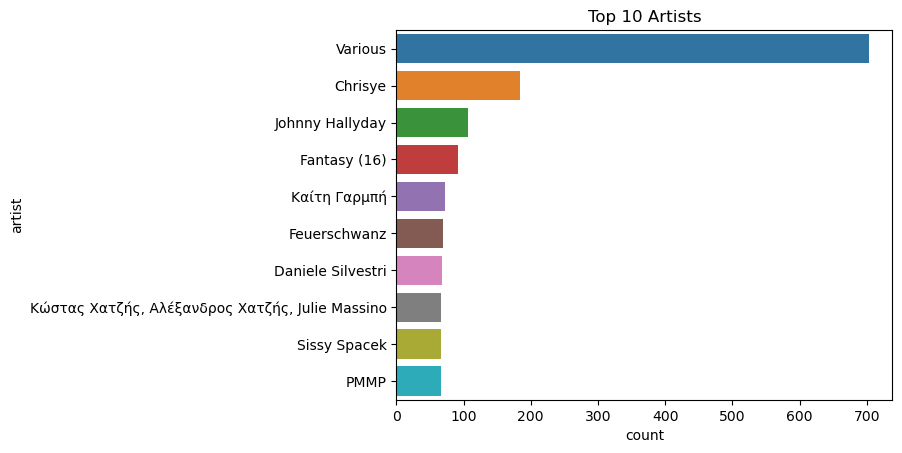

In [41]:
sns.countplot(data=df, y='artist', order=df['artist'].value_counts().iloc[:10].index)
plt.title('Top 10 Artists')
plt.show()

<Axes: title={'center': 'Top 10 Genres'}, ylabel='genre'>

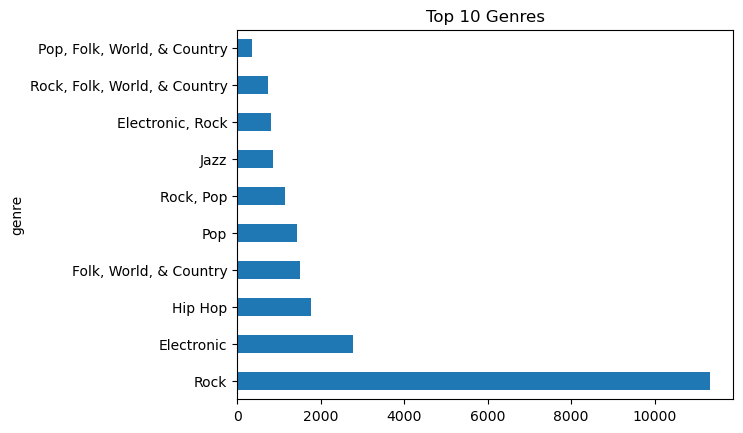

In [43]:
# Genre distribution
df['genre'].value_counts().iloc[:10].plot(kind='barh', title='Top 10 Genres')

In [ ]:
# incorporating sentiment analysis - need to use output_clean_lyrics or tokenize_mini_w_sentiment
# Histogram
df['sentiment_score'].hist(bins=30)
plt.title('Distribution of Sentiment Scores')

# Boxplot 
sns.boxplot(data=df, x='genre', y='sentiment_score')
plt.xticks(rotation=45)

# Mean sentiment
df.groupby('genre')['sentiment_score'].mean().sort_values(ascending=False).plot(kind='bar')

# Violin plot
sns.violinplot(data=df, x='genre', y='sentiment_score', inner='quartile')
plt.xticks(rotation=45)

df.groupby('release_year')['sentiment_score'].mean().plot()
plt.title("Average Sentiment Score per Year")

heatmap_data = df.groupby(['release_year', 'release_month']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("Release Frequency Heatmap")

In [49]:
# Frequency encoding - replace each category with the frequency of its occurrence
freq_map = df['genre'].value_counts().to_dict()
df['genre_freq'] = df['genre'].map(freq_map)

Text(0.5, 1.0, 'Number of Songs Released per Year')

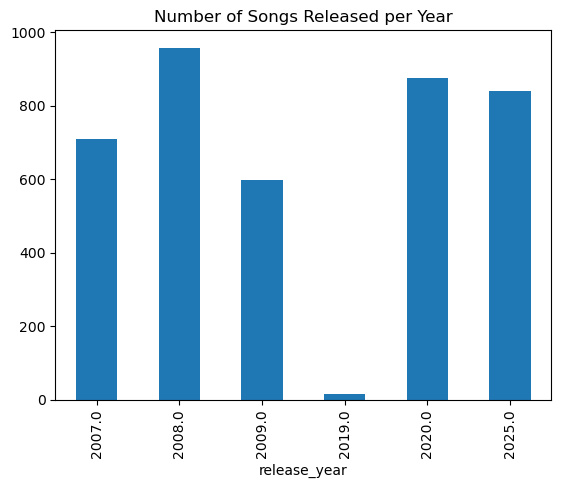

In [55]:
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Songs Released per Year")
# Whoop! There's some 2019 songs in there!!!
# Not accurate, due to the fact that this is a sample, but should be checked for the full dataset

In [ ]:
# Boxplots-good for visualizing statistical output of continuous quant data
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example dataset
data = df

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True)

In [ ]:
# Barplots-good for showing counts (or use countplot), for categorical data
# Version 1
df = pd.crosstab(heart3['cp'], heart['output'])

# Make the crosstab more visual
sns.set(font_scale=1.3)
sns.set_style("white")

df.plot(kind='bar',
        figsize=(11,7),
        color=['#e1d3c1', '#c64343']);

plt.title("Heart Attack Risk vs. Chest Pain Type", fontsize=20)
plt.xlabel("Chest Pain types", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(['Lower Risk','Higher Risk'], fontsize=14)
plt.xticks(rotation=0);

# Version 2
#--------------------------------------------
plt.figure(figsize=(14,8))
sns.set(font_scale=1.2)
sns.set_style("white")

sns.countplot(x=heart["age"],
              palette='Reds')


plt.title("Count of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.show()

# Version 3
# ---------------------------------------------
df = pd.crosstab(heart['output'],heart['sex'])

sns.set_style("white")

df.plot(kind="bar",
        figsize=(6,6),
        color=['#c64343', '#e1d3c1']);

plt.title("Heart Attack Risk vs Sex ", fontsize=16)
plt.xlabel("0 = Lower Risk                  1 = Higher Risk", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(["Female","Male"], fontsize=14)
plt.xticks(rotation=0)

In [ ]:
# Histograms-good for continuous quant data, shows DISTRIBUTION of data
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [ ]:
# Linemaps
plt.figure(figsize=(8,6))

sns.lineplot(y="chol",
             x="age",
             data=heart,
             color="red")

plt.title("Cholesterol with Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Cholesterol Level",fontsize=16)
plt.show()

In [ ]:
# Heatmaps-good for showing relationships between features (NUMERICAL ONLY)
plt.figure(figsize=(12,10))
sns.set(font_scale=0.9)

sns.heatmap(heart.corr(),
            annot=True,
            cmap='Reds')

plt.title("Correlation Between Variables", size=15)
plt.show()

In [ ]:
# Scatterplots-good for inital data visualization, discrete/continuous quant data
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Scatter plot of point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

In [ ]:
# Distribution
#Version 1
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")

sns.distplot(heart[heart["output"]==0]["chol"],
             color="blue")
sns.distplot(heart[heart["output"]==1]["chol"],
             color="red")

plt.title("Heart Attack Risk vs Cholesterol", size=20)
plt.xlabel("Cholesterol Level", fontsize=16)
plt.ylabel("Density", fontsize=16)
plt.legend(["Lower Risk","Higher Risk"], fontsize=14)
plt.show()

# Version 2
#----------------------------------------------------
sns.set(font_scale=1.3)
plt.figure(figsize=(8,6))
sns.set_style("white")

sns.distplot(heart['age'],
             color='red',
             kde=True)


plt.title("Distribution of Patients Age",fontsize=20)
plt.xlabel("Age",fontsize=16)
plt.ylabel("Density",fontsize=16)
plt.show()

Data Cleaning

1. Initial Assessment
Use df.head(), df.info(), and df.describe() to understand the structure, data types, and basic statistics.
Missing Values: Check for missing values using df.isnull().sum() and identify patterns. 
2. Handling Missing Data
Analysis: Analyze patterns in missing data to choose the appropriate method.
Imputation: Fill missing values using df.fillna() with methods like mean, median, or mode.
Remove: Remove rows or columns with missing values using df.dropna(). 
3. Duplicates
Use df.duplicated() to find duplicate rows.
Use df.drop_duplicates() to remove them.
4. Data Types
Use df.dtypes to check data types of columns.
Use df['column'].astype() or pd.to_datetime() to convert to the correct types.
5. Text and Categorical Data
Use string methods like lower(), upper(), strip(), and replace() to standardize text.
Fix spelling variations and merge similar categories.
Use regular expressions for complex pattern matching.
6. Outliers
Use visualizations (box plots, scatter plots) or statistical methods (IQR) to identify outliers.
Decide to remove, transform, or cap outliers based on their nature and impact.
7. Structural Errors
Clean column names using string methods and ensure they are consistent.
Apply consistent formatting across similar fields.
8. Transformations
Normalize numerical features using methods like min-max scaling or standardization.
Encode categorical data using one-hot encoding or label encoding.
9. Validation
Validate and cross-check data against other sources or domain knowledge.
Check summary statistics after cleaning to verify results.
10. Saving Data
Use df.to_csv() or similar functions to save the cleaned dataset.

Data Cleaning Visualization Techniques
Histograms: Used to visualize the distribution of numerical data. Helps identify outliers and skewness.
Bar plots: Useful for visualizing categorical data and frequency distributions.
Box plots: Show the distribution of numerical data, highlighting medians, quartiles, and outliers.
Scatter plots: Display the relationship between two numerical variables, useful for identifying correlations.
Heatmaps: Useful for visualizing the correlation matrix between numerical features.
Line plots: Used for visualizing time series data or trends over a continuous variable.
Missing data visualizations: Use heatmaps or bar plots to display the pattern and extent of missing values in the dataset.



## Data transformation

In [ ]:
# PCA, ICA, LDA